# Лабораторная работа 1
### Выполнил: Ходалицкий Павел Юрьевич (ИрНИТУ)

Добро пожаловать в лабораторную работу! 
Оформите ваше решение контеста Kaggle в соответствии с этим шаблоном. Ваша задача - показать проверяющим ход ваших рассуждений, поэтому советуем писать много комментариев к коду и приводить комментарии к логике на каждом этапе в текстовых ячейках. 
Где необходимо, используйте графики для большей наглядности.

При отправке поменяйте название файла на ваши ФИО!

### EDA (исследовательский анализ данных)

В этом разделе вам необходимо провести анализ вашего датасета, интерпретировать признаки, выяснить их значимость и исследовать зависимости между ними.

In [198]:
# exploratory data analysis

# Импортируем необходимые для работы библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [199]:
my_seed = 12011021
random.seed(my_seed)
np.random.seed(my_seed)

In [200]:
# Получим данные. #В этом датасете отуствие данных представленно через NaN, соответсвенно:
train_data = pd.read_csv('train.csv', na_values=["NaN"])
test_data = pd.read_csv('test.csv', na_values=["NaN"])

In [201]:
train_data

,id,carat,cut,color,clarity,depth,table,x,y,z,theta1,theta2,price
0,17044,0.28,Ideal,F,VVS2,61.6,55.0,4.22,4.26,2.61,5,5,612
1,30625,0.28,Ideal,I,VS1,62.5,54.0,4.18,4.23,2.63,5,6,448
2,17043,0.28,'Very Good',F,IF,62.2,55.0,4.23,4.26,NaN,5,7,612
3,37947,0.28,'Very Good',E,VS2,63.0,59.0,4.11,4.15,2.60,5,8,487
4,30626,0.28,Ideal,I,VS1,62.4,54.0,4.18,4.19,2.61,5,9,448
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40448,25132,2.02,Premium,J,VS2,62.0,59.0,8.06,8.08,5.00,27,23,13687
40449,25135,2.02,'Very Good',J,VS2,59.3,60.0,8.28,8.34,4.93,27,24,13693
40450,27141,2.02,'Very Good',I,SI1,60.4,58.0,8.20,8.16,4.94,27,25,17357
40451,24778,2.02,Good,H,SI2,59.0,61.0,8.26,8.31,4.89,27,27,13144


#### Проанализируем признаки

Начнем с категориальных.

Несмотря на то, что признак "cut" - категориальный, на мой взгляд было бы уместно использовать его как регрессор в линейной модели, т.к сам признак имеет на себе установленный порядок.

Так же, стоит поступить и с признаком "clarity". На "clarity" явно задан порядок: более чистый FL алмаз будет явно цениться больше, чем I3 - с явными "inclusions". https://en.wikipedia.org/wiki/Diamond_clarity

Так же стоит проверить, влияет ли цвет, на стоимость

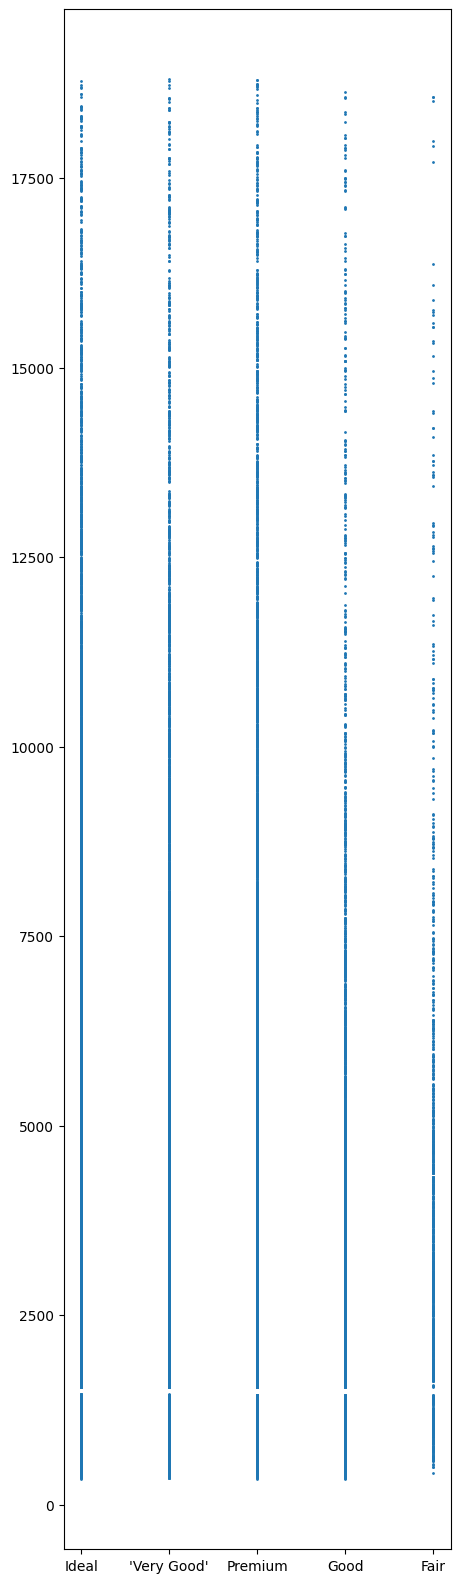

In [202]:
#Проверим гипотезу о том, что cut влияет на стоимость:
plt.figure(figsize=(5, 20))
plt.scatter(train_data['cut'], train_data['price'], s=1)

#Как видно из графика, чем хуже категория 'cut' тем меньше в ней дорогих алмазов

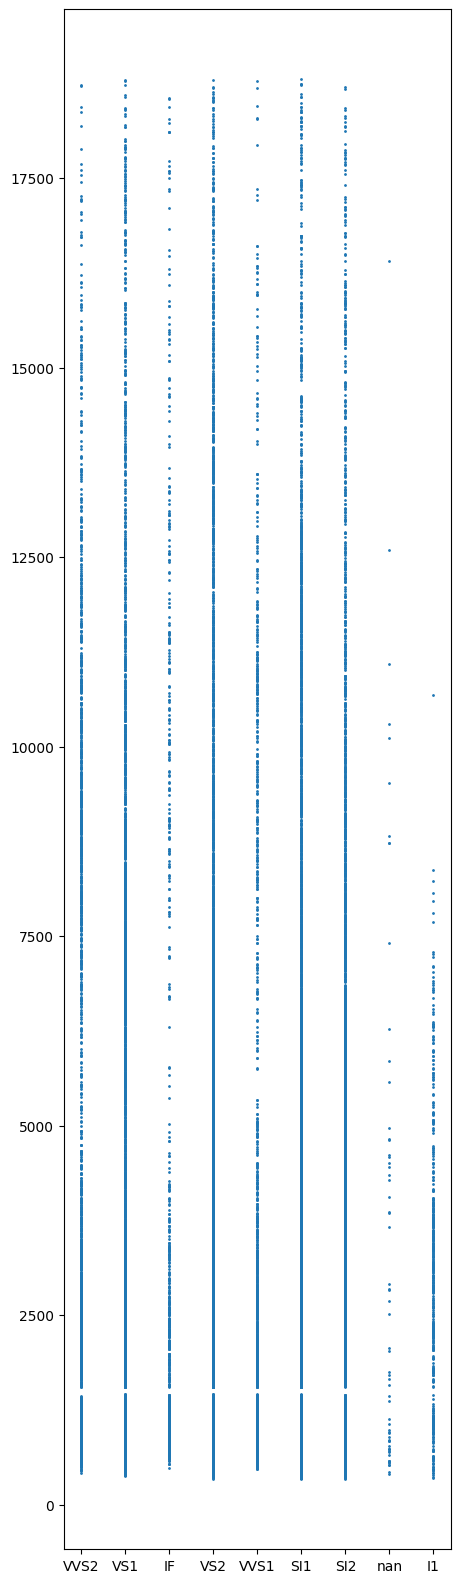

In [203]:
#Проверим гипотезу о том, что clarity влияет на стоимость:
plt.figure(figsize=(5, 20))
plt.scatter(train_data['clarity'].apply(lambda x: str(x)), train_data['price'], s=1)

#Практически очевидно, что чем чище алмаз, тем он дороже. Хоть на графике эта зависимость не очевидна

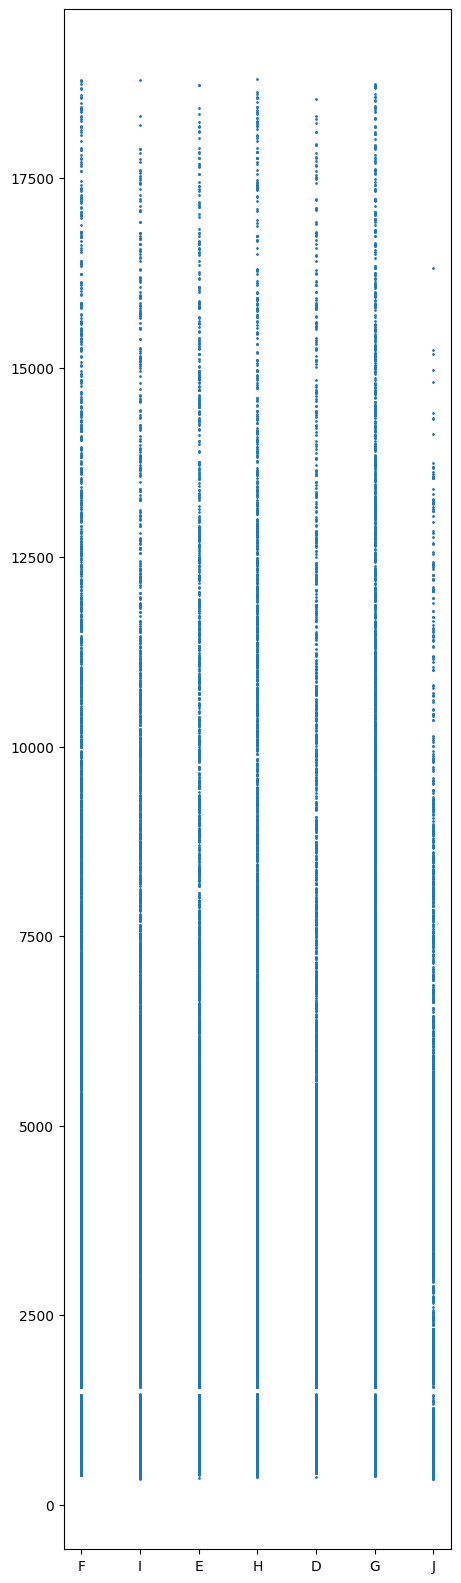

In [204]:
plt.figure(figsize=(5, 20))
plt.scatter(train_data['color'].apply(lambda x: str(x)), train_data['price'], s=1)

# Цвет алмаза влияет на цену. Доверимся источнику)
# ист: https://chicagodiamondbuyer.net/diamond-colors-does-the-color-of-my-diamond-affect-its-value/

Признаки *theta1* и *theta2*

В отличии от ранее рассмотренных признаков, эти - уже числовые. (Т.е не надо переживать о задании лишнего порядка)

Остается только убедиться в их влиянии на цену.


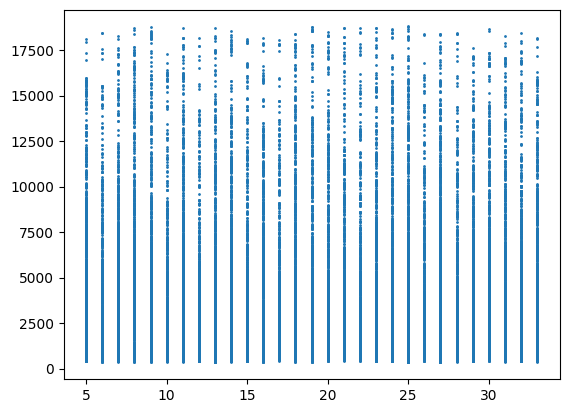

In [205]:
plt.scatter(train_data['theta1'], train_data['price'], s=1)

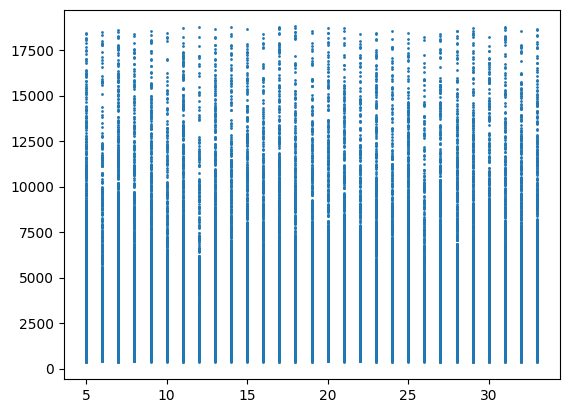

In [206]:
plt.scatter(train_data['theta2'], train_data['price'], s=1)

Я не вижу здесь какой-то зависимости и рискну предположить, что theta1 и theta2 - никак не влияют на стоимость.

Перейдем к другим числовым признакам

In [207]:
# Выявим, какие признаки являются числовыми
train_data.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
theta1       int64
theta2       int64
price        int64
dtype: object

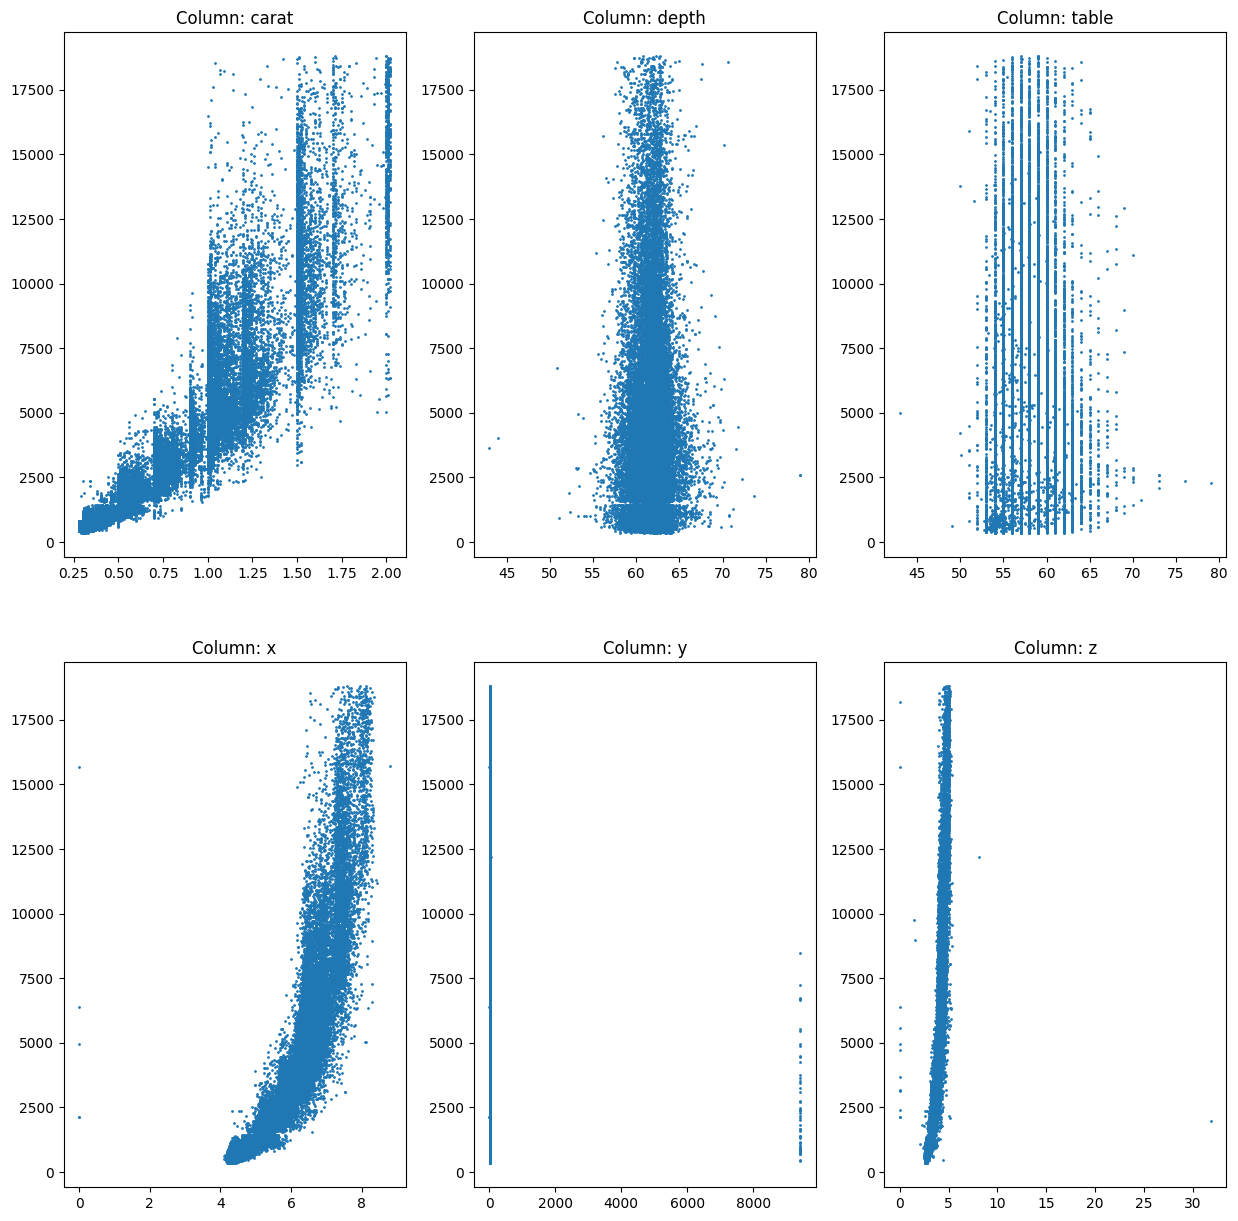

In [208]:
# После того, как мы рассмотрели, по моему мнению значимые для результата категориальные призаки
# Имеент смысл выявить зависимости таргета от числовых данных, 

# Уберем таргет и id, а так же theta1 и theta2
depends_data = train_data.loc[:, ~train_data.columns.isin(['id', 'price', 'theta1', 'theta2'])]

#Далее получим графики зависимостей таргета от признаков

figure, axis = plt.subplots(2, 3)

figure.set_figheight(15)
figure.set_figwidth(15)

row = 0
column = 0
for col in depends_data.columns:
    if depends_data[col].dtype in ("float64", "int64"):
        axis[row, column].scatter(train_data[col], train_data["price"], s=1)
        axis[row, column].set_title(f"Column: {col}")
        if column == 2:
            column = 0
            row += 1
        else:
            column += 1

In [209]:
#Посмотрим так же на корреляцию между признаками:

print(depends_data[['carat', 'depth', 'table', 'x', 'y', 'z']].corr())

          carat     depth     table         x         y         z
carat  1.000000  0.029604  0.185119  0.980862 -0.007003  0.951801
depth  0.029604  1.000000 -0.287921 -0.028495  0.001801  0.098869
table  0.185119 -0.287921  1.000000  0.197000 -0.002308  0.149056
x      0.980862 -0.028495  0.197000  1.000000 -0.005437  0.962128
y     -0.007003  0.001801 -0.002308 -0.005437  1.000000 -0.005011
z      0.951801  0.098869  0.149056  0.962128 -0.005011  1.000000


Проанализируем полученные данные

Признаки "z" и "carat" сильно скоррелированны, поэтому, стоит исключить признак "z" из модели.

Признаки "x" и "carat" сильно скоррелированны, поэтому, стоит исключить признак "x" из модели.

Зависимость таргета "price" от "carat" - явно не линейная. Далее выявим, в какой лучше степени ввести этот признак в модель. Аналогично поступим с "y"

Признак "y", предположительно имеет в себе "аномальные" данные. Далее отфильтруем и посмотрим на зависимость еще раз

Признак "table" - похож на признак категориальный. Далее проведем эксперимент по добавлению признака в модель.

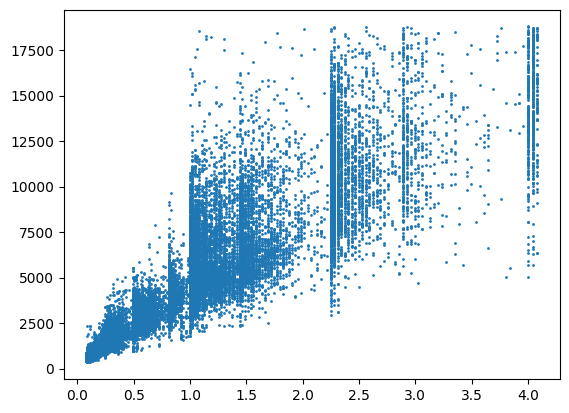

In [210]:
#Разберемся с "carat"

#Зависимость становится линейной во 2-ой степени
plt.scatter(train_data['carat'].apply(lambda x: x**2), train_data['price'], s=1)

Прежде чем перейти к "y", разберемся с аномальными данными в этих признаках

In [211]:
#Как видно даннын из столбца y разделяются на 2 группы.
print(max(train_data["y"]))

#Узнаем, как много таких значений

#Больше 8000
print(train_data['y'].ge(8000).sum())
#Больше 5000
print(train_data['y'].ge(5000).sum())
#Больше 100
print(train_data['y'].ge(100).sum())
#Больше 100
print(train_data['y'].ge(10).sum())

9428.922352789632
56
56
56
58


Таким образом, скорее всего, эти данные аномальны и имеет смысл заменить их на среднее значение

Пересмотрим завимость price от y с учетом полученного знания

In [212]:
y_updated = train_data['y'].where(train_data['y'] <= 8000, np.nan)

mean_y = y_updated.mean()

y_updated = y_updated.fillna(mean_y)

print(f"Кол-во >= 1000: {y_updated.ge(1000).sum()}")
print(f"Кол-во NaN: {y_updated.isna().sum()}")

Кол-во >= 1000: 0
Кол-во NaN: 0


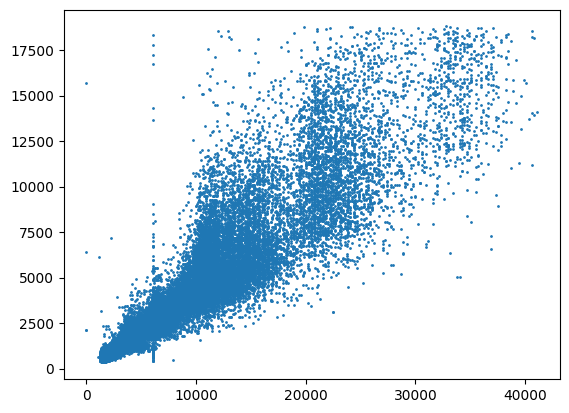

In [213]:
y_updated = y_updated.where(y_updated <= 20, np.nan)
# Зависимость становится линейной только при 5-ой степени
plt.scatter(y_updated.apply(lambda x: x**5), train_data["price"], s=1)

#### Значимость признаков


*...Можно сделать вывод, что если не выполнять проверок на значимость предикторных переменных, то для получения хорошей МНК-оценки коэффициентов регрессии лучше взять предикторных переменных больше, нежели недобрать их.*

ИСТ: http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%BD%D0%B0%D1%87%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D1%8C_%D0%BA%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%BB%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%BE%D0%B9_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%B8

Несмотря на выше написанное, я все-же хотел проверить значимость некоторых признаковю. Для подсчета критерия Фишера необходимо иметь вектор оценок, который, если вычислять для этих данных напрямую (по формуле нахождения МНК оценок((X^T*X)^-1*X^T*y)), требует очень очень много памяти(сколько нельзя аллоцировать ни на одном моем устройстве (12.2 GB)).

Может есть какой-то другой способ или я что-то делал не так. В любом случае, на результате не должно сильно сказаться.

## Выводы из анализа:

1) Помимо очевидных числовых признаков в регрессию стоит ввести катериольные признаки "cut", "clarity" и "color".
2) Стоит провести эксперимент по добавлению "table" в модель
3) Имеет смысл ввести признак "carat" в квадрате.
   Имеет смысл ввести признак "y" в 5-ой степени.
4) Не берем в модель признаки "x", "z" так как они сильно коррелированны с "carat" 

### Preprocessing (подготовка данных)

 В этом разделе вам необходимо реализовать подготовку ваших данных, в том числе заполнение пропусков, фильтрацию выбросов, кодирование категориальных признаков и т.д. В этот же раздел включите любые операции над данными, которые сочтете нужными.

In [214]:
print(train_data.isna().sum(), end="\n")

claritys = train_data['clarity']
print(claritys.value_counts(), end="\n")

colors = train_data['color']
print(colors.value_counts(), end="\n")

id          0
carat       0
cut         0
color       0
clarity    64
depth      57
table       0
x          48
y          60
z          42
theta1      0
theta2      0
price       0
dtype: int64
clarity
SI1     10082
VS2      9390
SI2      6608
VS1      6204
VVS2     3605
VVS1     2624
IF       1366
I1        510
Name: count, dtype: int64
color
G    8666
E    7276
F    7197
H    6207
D    5254
I    3927
J    1926
Name: count, dtype: int64


In [215]:
# Будем строить BoxPlot
import seaborn as sns

#Создадим базу - то, что будит в любой эксперементальной модели
#  - далее сюда добавятся дополнительные признаки
base = train_data[['cut', 'color', 'clarity', 'carat', 'depth', 'y']].copy()
base['clarity'] = base['clarity'].apply(str)

#Тут я посчитал не уместым заменять nan-ы признака "clarity" поэтому, удалим строки, где clarity - nan
indexes = base.loc[base['clarity'] == "nan"].index
base = base.drop(index=indexes, axis=0)
base = base.reset_index(drop=True)
train_data = train_data.drop(index=indexes, axis=0)
train_data = train_data.reset_index(drop=True)

#Вводим дамми переменные для категориальных признаков
base = pd.get_dummies(base, columns=['cut', 'color', 'clarity'], drop_first=True, dtype=int)

In [216]:
# Эта функция чистит признаки от выбросов меняя их на nan. Далее nan будет заменен средним значением.
# Параметр fill_with_nan при значении true заменяет выборсы на nan, иначе - удаляет строки с выбросами.
def remove_outliners(data, train_data, column, threshold, threshold2, fill_with_nan):
    if fill_with_nan:
        data[column] = data[column].where(data[column] <= threshold, np.nan)
        data[column] = data[column].where(data[column] >= threshold2, np.nan)
        return data, train_data
    indexes = list(data.loc[data[column] >= threshold].index)
    indexes += list(data.loc[data[column] <= threshold2].index)
    data = data.drop(index=indexes, axis=0)
    data = data.reset_index(drop=True)
    train_data = train_data.drop(index=indexes, axis=0)
    train_data = train_data.reset_index(drop=True)
    return data, train_data

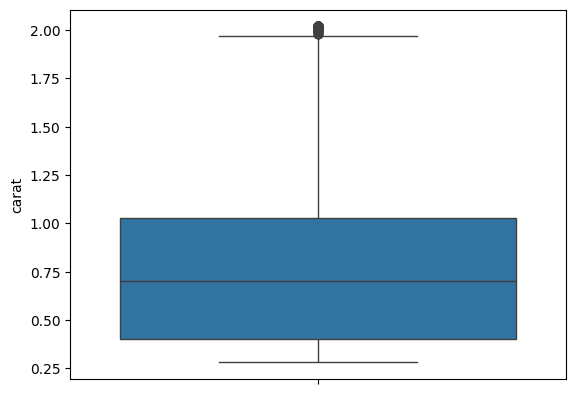

In [217]:
# Посмотрим на выборсы признака "carat"
sns.boxplot(base["carat"])
plt.show()

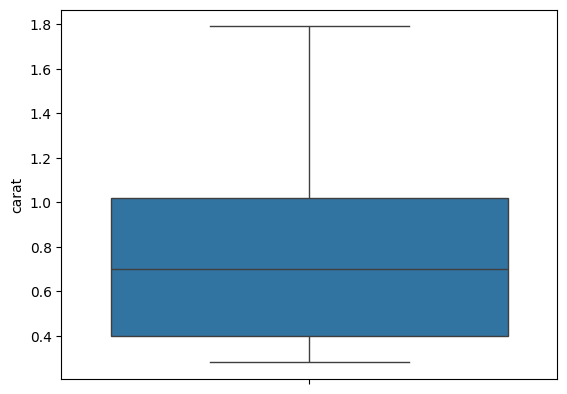

In [218]:
# Удалим выбросы на признаке "carat"
base, train_data = remove_outliners(base, train_data, "carat", 1.8, 0, False)
sns.boxplot(base["carat"])
plt.show()

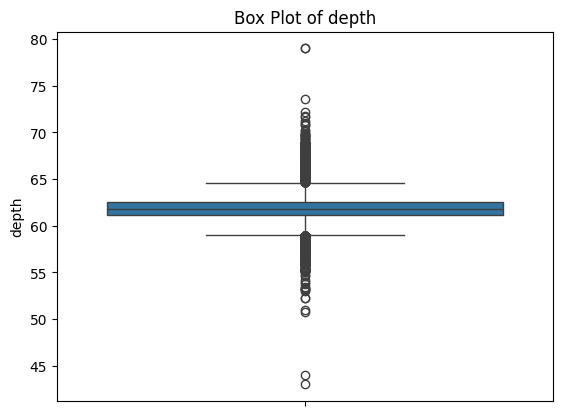

In [219]:
#Посмотрим на выбросы признака "depth"
sns.boxplot(base["depth"])
plt.title(f'Box Plot of {"depth"}')
plt.show()

<Axes: ylabel='depth'>

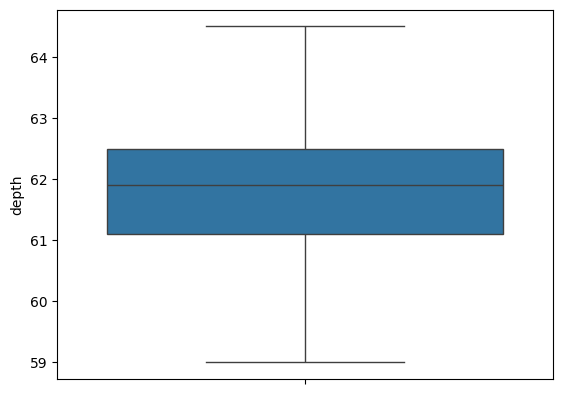

In [220]:
#Почистим выборсы на признаке "depth"
base, train_data = remove_outliners(base, train_data, "depth", 64.5, 59, True)
sns.boxplot(base["depth"])

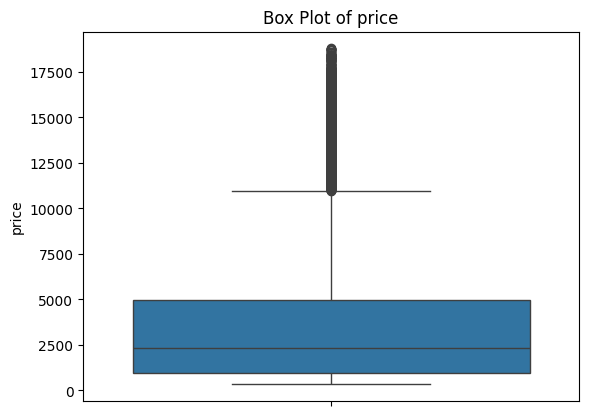

In [221]:
# Так же почистим таргет от выбросов:
sns.boxplot(train_data["price"])
plt.title(f'Box Plot of {"price"}')
plt.show()

<Axes: ylabel='price'>

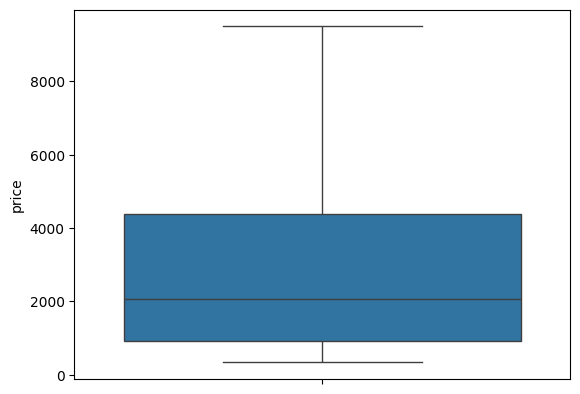

In [222]:
#Почистим выборсы на таргете
train_data, base = remove_outliners(train_data, base, "price", 9500, 0, False)
sns.boxplot(train_data["price"])

In [223]:
#Аналогично поступим с признаком "y":
base, train_data = remove_outliners(base, train_data, "y", 30, 0, True)
# sns.boxplot(base["y"])
# plt.show()

#### Введем признаки в предсказанных степенях

In [224]:
carat_e = base['carat'].apply(lambda x: x**2)
y_e = base['y'].apply(lambda x: x**5)

base_with_exps = pd.concat([base, carat_e.to_frame(), y_e.to_frame()], axis=1)

print(base_with_exps)

       carat  depth     y  cut_Fair  cut_Good  cut_Ideal  cut_Premium  \
0       0.28   61.6  4.26         0         0          1            0   
1       0.28   62.5  4.23         0         0          1            0   
2       0.28   62.2  4.26         0         0          0            0   
3       0.28   63.0  4.15         0         0          0            0   
4       0.28   62.4  4.19         0         0          1            0   
...      ...    ...   ...       ...       ...        ...          ...   
36820   1.77   63.4  7.61         0         0          0            0   
36821   1.77   63.4  7.65         0         1          0            0   
36822   1.78   63.8  7.62         0         1          0            0   
36823   1.78   62.6  7.72         0         0          0            1   
36824   1.79    NaN  7.94         0         1          0            0   

       color_E  color_F  color_G  ...  color_J  clarity_IF  clarity_SI1  \
0            0        1        0  ...        0  

### Model & training (Выбор модели и её обучение)

В этом разделе описываете модель и ставите эксперименты по обучению.

Если вы ставили много экспериментов, приведите их в хронологическом порядке чтобы мы увидели эволюцию ваших рассуждений.

Будем ставить эксперименты + выбирать модель

In [225]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [226]:
avg_scores={}
best_params={}

In [227]:
#Параметры для моделей:
cv_count = 10
# Максимальное значение коэффицентов регуляризации в моделях (n - 1) / 10
# Используется в GridSearcCV
parametrs_max_val = 21

# Подробность вывода
verbose = 1

In [228]:
# LinearModel
pipline_linear = Pipeline([("Scaler", StandardScaler()),
                           ("SimpleImputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                           ("model", LinearRegression(fit_intercept=True))])

# ElasticNet
pipline_elastic = Pipeline([("Scaler", StandardScaler()),
                            ("SimpleImputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                            ("model", ElasticNet(fit_intercept=True))])
grid_search_elastic = GridSearchCV(pipline_elastic,
                                   [{"model__alpha":[i/10 for i in range(1, parametrs_max_val)], 
                                     "model__l1_ratio":[i/10 for i in range(1, 11)],
                                     "model__positive":[True, False],
                                    }],
                                   cv=cv_count, 
                                   scoring=make_scorer(mean_absolute_error),
                                   verbose=verbose)

# Lasso
pipline_lasso = Pipeline([("Scaler", StandardScaler()),
                          ("SimpleImputer", SimpleImputer(missing_values=np.nan, strategy="mean")),
                          ("model", Lasso(fit_intercept=True, positive=True))])
grid_search_lasso = GridSearchCV(pipline_lasso,
                                 [{"model__alpha":[i/10 for i in range(1, parametrs_max_val)],
                                   "model__positive":[True, False],
                                   }], 
                                 cv=cv_count, 
                                 scoring=make_scorer(mean_absolute_error),
                                 verbose=verbose)

#Ridge
pipline_ridge = Pipeline([("Scaler", StandardScaler()),
                          ("SimpleImputer", SimpleImputer(missing_values=np.nan, strategy="mean")), 
                          ("model", Ridge(fit_intercept=True))])
grid_search_ridge = GridSearchCV(pipline_ridge,
                                 [{"model__alpha":[i/10 for i in range(1, parametrs_max_val)],
                                   "model__positive":[True, False],
                                   }], 
                                 cv=cv_count, 
                                 scoring=make_scorer(mean_absolute_error),
                                 verbose=verbose)

# Эта функция выдает лучшую модель для переданных данных
# Не указывть elastic_net==True если у вас не много времени:)
def test_hypothesis(data, elastic_net=False):
    print("Обучаем LinearModel")
    result_linear = cross_validate(pipline_linear, data, train_data['price'], cv=cv_count, scoring={"MAE": make_scorer(mean_absolute_error, )})
    avg_scores['LinearRegression'] = sum(result_linear['test_MAE'])/cv_count

    print("Обучаем Lasso")
    grid_search_lasso.fit(data, train_data['price'])
    avg_scores['Lasso'] = grid_search_lasso.best_score_
    best_params['Lasso'] = grid_search_lasso.best_params_

    print("Обучаем Ridge")
    grid_search_ridge.fit(data, train_data['price'])
    avg_scores['Ridge'] = grid_search_ridge.best_score_
    best_params['Ridge'] = grid_search_ridge.best_params_

    if elastic_net:
        grid_search_elastic.fit(data, train_data['price'])
        avg_scores['ElasticNet'] = grid_search_elastic.best_score_
        best_params['ElasticNet'] = grid_search_elastic.best_params_

    min_key = None
    min_score = 10000
    for key in avg_scores:
        if avg_scores[key] < min_score:
            min_score = avg_scores[key]
            min_key = key
    return {"Best Model": (min_key, avg_scores[min_key]),
            "Best Params": best_params.get(min_key),
            "Average score": (sum(avg_scores.values()) / len(avg_scores))}

In [229]:
test_hypothesis(base)

Обучаем LinearModel
Обучаем Lasso
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Обучаем Ridge
Fitting 10 folds for each of 40 candidates, totalling 400 fits


{'Best Model': ('LinearRegression', np.float64(498.56519020803535)),
 'Best Params': None,
 'Average score': np.float64(522.3051164383752)}

#### Эксперимент 1

Предположение: Данные со степенями дают меньшую ошибку, чем без

In [230]:
avg_scores={}
best_params={}
test_hypothesis(base_with_exps, False)

Обучаем LinearModel
Обучаем Lasso
Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.230e+09, tolerance: 1.753e+07
  model = cd_fast.enet_coordinate_descent(
/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.296e+09, tolerance: 1.761e+07
  model = cd_fast.enet_coordinate_descent(
/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Обучаем Ridge
Fitting 10 folds for each of 40 candidates, totalling 400 fits


{'Best Model': ('LinearRegression', np.float64(532.7135273578904)),
 'Best Params': None,
 'Average score': np.float64(588.5448056009444)}

Вывод: Да, введение степеней положительно влияет на качество модели

#### Эксперимент 2

Предположение: Есть набор степеней лучший, чем полученный аналитически:

In [231]:
# Тогда найдем 

test = []
for yexp in range(6):
    for caratexp in range(6):
        carat_e = base['carat'].apply(lambda x: x**caratexp) # Тета 
        y_e = base['y'].apply(lambda x: x**yexp)
        
        new_test_exp = pd.concat([base, carat_e.to_frame(), y_e.to_frame()], axis=1)
        result = result_linear = cross_validate(pipline_linear, new_test_exp, train_data['price'], cv=5, scoring={"MAE": make_scorer(mean_absolute_error, )})
        test.append((result, [yexp, caratexp]))

In [232]:
min_avg_err = 10000
best_index = 0
best_params = []
for index, item in enumerate(test):
    mae_res = sum(item[0]['test_MAE']) / 5
    if mae_res < min_avg_err:
        min_avg_err = mae_res
        best_index = index
        best_params = item[1]

print(min_avg_err, best_index, best_params)

555.5810943940593 12 [2, 0]


In [233]:
# Проверим, действительно ли лучше результат
carat_e = base['carat'].apply(lambda x: x**0)
y_e = base['y'].apply(lambda x: x**2)

new_exps_test = pd.concat([base, carat_e.to_frame(), y_e.to_frame()], axis=1)

In [234]:
avg_scores={}
best_params={}
test_hypothesis(new_exps_test, False)

Обучаем LinearModel
Обучаем Lasso
Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.407e+09, tolerance: 1.753e+07
  model = cd_fast.enet_coordinate_descent(
/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.502e+09, tolerance: 1.761e+07
  model = cd_fast.enet_coordinate_descent(
/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.794e+09, tolerance: 1.912e+07
  model = cd_fast.enet_coordinate_descent(
/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.037e+09, tolerance: 1.682e+07
  model = cd_fast.enet_coordinate_descent(
/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Обучаем Ridge
Fitting 10 folds for each of 40 candidates, totalling 400 fits


{'Best Model': ('LinearRegression', np.float64(488.60294844763064)),
 'Best Params': None,
 'Average score': np.float64(522.4087213939268)}

Вывод: Да, найденный подбором набор лучше. Результат парадоксальный, однако, скорее всего он указывает на ошибку в обработке данных. Я СНАЧАЛА определил необходимые степени, а потом отфильтровал выбросы, что, вероятно, неправильно. Тем не менее найден лучший набор гиперпараметров.

Что удивляет дополнительно - признак carat в 0-вой степени

#### Эксперимент 3

Предположение: Введение "Table" уменьшит ошибку

In [235]:
# Добавим к лучшем на данный момент датасету признак "table"
new_exps_test = pd.concat([new_exps_test, train_data['table']], axis=1) 

# Отфильтруем выбромы в этом признаке.
new_exps_test, train_data = remove_outliners(new_exps_test, train_data, "table", 63.5, 51.5, True)

# Проверим, верно ли предположение
avg_scores={}
best_params={}
test_hypothesis(new_exps_test, False)

Обучаем LinearModel
Обучаем Lasso
Fitting 10 folds for each of 40 candidates, totalling 400 fits


/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.392e+09, tolerance: 1.753e+07
  model = cd_fast.enet_coordinate_descent(
/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.494e+09, tolerance: 1.761e+07
  model = cd_fast.enet_coordinate_descent(
/home/pleiada/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap

Обучаем Ridge
Fitting 10 folds for each of 40 candidates, totalling 400 fits


{'Best Model': ('LinearRegression', np.float64(488.89241720324196)),
 'Best Params': None,
 'Average score': np.float64(520.1294246144618)}

In [236]:
new_exps_test = new_exps_test.drop(columns=["table",])

Вывод: введение признака Table почти не влияет на модель (незначительно увеличивает ошибку)

Вывод из экспериментов:

1) Лучшая модель: LinearRegression, без параметров
2) Лучший набор данных: new_exps_test

### Evaluation (оценка качества модели)

В этом разделе проводите оценку качества вашей итоговой модели. 

In [241]:

# Подготовим данные для получения prediction
test_data_processed = test_data.loc[:, ~test_data.columns.isin(['id', 'price', 'theta1', 'theta2', 'table', 'x', 'z'])]
test_data_processed['clarity'] = test_data_processed['clarity'].apply(str)
test_data_processed = pd.get_dummies(test_data_processed, columns=['cut', 'color', 'clarity'], drop_first=True, dtype=int)

carat_e = test_data_processed['carat'].apply(lambda x: x**0)
y_e = test_data_processed['y'].apply(lambda x: x**2)

test_data_processed = pd.concat([test_data_processed, carat_e.to_frame(), y_e.to_frame()], axis=1)

#Создадим пайплайн обработки данных:
pipline = Pipeline([("SimpleImputer", SimpleImputer(missing_values=np.nan, strategy="mean")), ("model", LinearRegression(fit_intercept=True))])
#Обучим модель
pipline.fit(new_exps_test, train_data['price'])
#Сделаем предсказание
prediction = pipline.predict(test_data_processed)

/tmp/ipykernel_5021/884571894.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_processed['clarity'] = test_data_processed['clarity'].apply(str)


In [243]:
sample_submission = pd.read_csv('sample_submission.csv', na_values=["NaN"])
sample_submission['price'] = prediction
sample_submission.to_csv("solution_final.csv", index=False, index_label=False)

### Conclusion (Выводы)

В этом разделе описываете полученные результаты и проводите анализ выполненной работы. 
Что получилось / не получилось и почему?

Выводы:

1) У меня не получилось оценить значимость признаков, быть может, потому что стоило поискать встроенные методы оценки значимости, но я посчитал это не очень важным, так как лучше перебрать признаки чем недобрать.

2) Удачным решением было исключить сильно скоррелированные признаки из модели.

3) Аналитический полученный набор показателей степеней оказался не лучшим и вероятно я знаю почему.
Я сначала определил необходимые степени, а потом отфильтровал выбросы, что, вероятно, неправильно. Тем не менее найден лучший набор гиперпараметров. Это, конечно, ошибка.

4) В итоговом решении появляются отрицательные предсказания, несмотря даже на то, что все признаки положительны и я ставил параметр positive=True в качетсве теста. Это лишь увеличивает ошибку, но отрицательные значения остаются. Быть может были плохо отфильтровны выбросы?
